<p class='main_title'>Neural Network Raw Implementation</p>
<hr>

Data source: <a href='https://www.kaggle.com/c/digit-recognizer/data'> Kaggle MNIST Database<a>

# Imports and functions

In [1]:
# Read zip file
import zipfile
# Math operations and data manipulation
import numpy as np
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px
import plotly.graph_objects as go
# Progress bar
from tqdm.auto import tqdm
# Temp fix for tqdm text in dark theme
from IPython.display import HTML, display

display(HTML('''
        <style>
            .jupyter-widgets {color: #d5d5d5 !important;}
            .widget-label {color: #d5d5d5 !important;}
        </style>
    '''))

In [2]:
def plot_ReLU_function():
    ticks_frequency = 1
    # Plot points
    fig, ax = plt.subplots(figsize=(5, 5))
    # Draw lines connecting points to axes
    ax.plot([-6, 0], [0, 0], c='gray', ls='-', lw=5, alpha=0.5)
    ax.arrow(0, 0, 5, 5, width=0.1, color='gray', edgecolor=None, alpha=0.5)
    # Scale coordinates
    xmin, xmax, ymin, ymax = -5, 5, -5, 5
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
    # Change spines coordinate system
    ax.spines['bottom'].set_position('zero'); ax.spines['left'].set_position('zero'); ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
    # Add X and Y labels
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03); ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
    # Draw grid lined up with ticks
    ax.grid(which='both', color='grey', linewidth=0.8, linestyle='-', alpha=0.2)
    ax.spines['bottom'].set_edgecolor('black'); ax.spines['left'].set_edgecolor('black'); 
    arrow_fmt = dict(markersize=10, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

    ax.annotate('Returns:\n\nx if x > 0    \n\n0 if x < 0', xy=(7, 2), xycoords='data', size=14, annotation_clip=False)
    plt.title('ReLU function', size=18, pad=20, loc='left')
    plt.show()

In [3]:
# Display libraries version
import session_info
session_info.show()

# Load data

## Loading dataset using `kaggle API`

In [4]:
!kaggle competitions download -c digit-recognizer

digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


## Reading files from zip with `pandas`

In [5]:
# Check files inside the zip
with zipfile.ZipFile('datasets/digit-recognizer.zip', 'r') as myzip:
     print(myzip.namelist())

['sample_submission.csv', 'test.csv', 'train.csv']


In [6]:
# read train/test data with pandas
with zipfile.ZipFile('datasets/digit-recognizer.zip', 'r') as myzip:
    train_df = pd.read_csv(myzip.open('train.csv'))
    test_df = pd.read_csv(myzip.open('test.csv'))

## Exploring the dataset

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [9]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


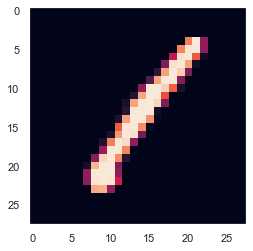

In [10]:
# Label = Number 1
label_example = train_df.iloc[0,0]
# Get only pixel columns and reshape into a 28x28 matrix
image_example = train_df.loc[0][1:].values.reshape(28,28)
# Display image
plt.imshow(image_example)
plt.grid(False);
# Thats a...

# NN Examples

## Single Neuron

Activation function:  
$a_{output}$
$=$
<font color='#fdbf11' size=5>$\sigma($</font>
$\sum$
<font color='#1696d2' size=5>$a_n$</font>
<font color='#55b748' size=5>$w_n$</font>
+
<font color='#e54096' size=5>$b$</font>
<font color='#fdbf11' size=5>$)$</font>
  
- <font color='#1696d2' size=5>$a_n$</font> input neurons  
- <font color='#55b748' size=5>$w_n$</font> neuron associated weight  
- <font color='#e54096' size=5>$b$</font> bias for the weighted sum get meaningfully active   
- <font color='#fdbf11' size=5>$\sigma(x)$</font> sigmoid (activation function)  
- $a_{output}$ neuron output  

In [11]:
# Set seed for reproducibility
np.random.seed(42)
# Define some inputs (X)
input_layer = np.random.uniform(0, 1, size=5)
# Define random weights
weights = np.random.uniform(-0.5, 0.5, size=5)
# Define a random bias value
bias = 3
# Calculate output value
output = sum(input_layer*weights) - bias
output

-3.187944804682159

Sigmoid function  
$f(x) = \sigma(x) = \frac{1}{1 + e^{-x}}  $  

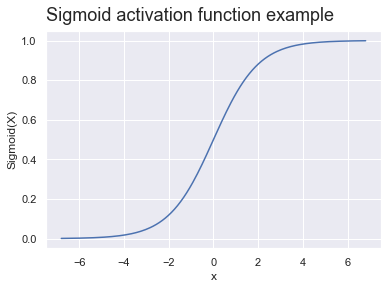

In [12]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
# Plot sigmoid function
x = np.linspace(-output-10, output+10, 200)
z = sigmoid(x)
plt.plot(x, z)
plt.title('Sigmoid activation function example', size=18, pad=10, loc='left')
plt.xlabel("x"); plt.ylabel("Sigmoid(X)"); plt.show()

In [13]:
# Apply sigmoid function
output = sigmoid(output)
output

0.03962190992044933

### Visualizing the Neural network

Neural network representation with 1 neuron
Inputs:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
Weights:  [-0.34400548 -0.44191639  0.36617615  0.10111501  0.20807258]
Activation function:  0.03962190992044933


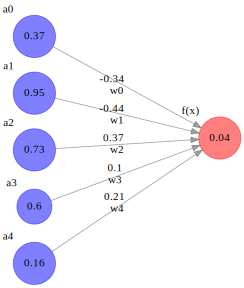

In [14]:
from graphviz import Digraph

graph = Digraph(engine='neato')
graph.attr(size='4')
# Add output node
graph.node('output', str(output.round(2)), xlabel='f(x)', color='#ff000080', style='filled', shape='circle', pos='15,-1')
# Add node for each input and it respective weight
for index, value in enumerate(input_layer):
    current_node = 'a' + str(index)
    current_weight = 'w' + str(index)
    graph.node(name=current_node, 
               label=str(value.round(2)),
               xlabel=current_node,
               color='#0000ff80', style='filled', shape='circle', pos=f'0,{-index}!')
    graph.edge(current_node, 'output',
               label=str(weights[index].round(2)),
               xlabel=current_weight,
               color='#42424280',)

print('Neural network representation with 1 neuron')
print('Inputs: ', input_layer)
print('Weights: ', weights)
print('Activation function: ', output)
graph

## Multiple neurons

<font size=5>$a^{(1)}_{0}$
$=$
<font color='#fdbf11'>$\sigma($</font>
<font color='#55b748'>$w_{0,0}$</font>
$a^{(0)}_1 + ... +  $
<font color='#55b748'>$w_{0,n}$</font>
$a^{(0)}_n + $
<font color='#1696d2'>$b_0$</font>
<font color='#fdbf11'>$)$</font>   
</font>  
Given $a^{(L)}_{i}$:  
- superscript $L$ corresponds to the layer  
- subscript $i$ corresponds to the neuron in that layer  
  

### Layers configuration

In [15]:
input_layer_size = 5
second_layer_size = 3
output_layer_size = 1

### Input layer

In [16]:
np.random.seed(42)
# Create inputs
input_layer = np.random.uniform(0, 1, size=input_layer_size)
# Create weights, 1 vector with 5 connections(from input) for each neuron in second layer(total of 3 vectors)
input_layer_weights = [np.random.uniform(-0.5, 0.5, size=input_layer_size) for index in range(second_layer_size)]
# Create biases for each neuron in the second layer
first_layer_bias = np.random.randint(1, 5, size=second_layer_size)

### Second layer

In [17]:
# Compute the actiation function for each neuron in the second layer
second_layer = [sigmoid(sum(input_layer*weights) - first_layer_bias[index]) for index, weights in enumerate(input_layer_weights)]
second_layer

[0.03962190992044933, 0.06230890666593959, 0.08628367892884775]

In [18]:
# Create weights for the second layer
second_layer_weights = [np.random.uniform(-0.5, 0.5, size=second_layer_size) for index in range(output_layer_size)]
second_layer_weights

[array([-0.45333434,  0.47375552, -0.26722866])]

In [19]:
# Create biases for each neuron in the output layer
second_layer_bias = np.random.randint(1, 5, size=second_layer_size)
second_layer_bias

array([2, 3, 2])

### Output layer

In [20]:
# Compute the actiation function for each neuron in the output layer
output_layer = [sigmoid(sum(second_layer*weights) - second_layer_bias[index]) for index, weights in enumerate(second_layer_weights)]
output_layer

[0.11800074683354274]

### Multiple NN visualization

Neural network representation with multiple neuron
Neurons from input layer:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
Weights from input layer:  [array([-0.34400548, -0.44191639,  0.36617615,  0.10111501,  0.20807258]), array([-0.47941551,  0.46990985,  0.33244264, -0.28766089, -0.31817503]), array([-0.31659549, -0.19575776,  0.02475643, -0.06805498, -0.20877086])]
Neurons from second layer:  [0.03962190992044933, 0.06230890666593959, 0.08628367892884775]
Weights from second layer:  [array([-0.45333434,  0.47375552, -0.26722866])]
Neurons from output layer:  [0.11800074683354274]


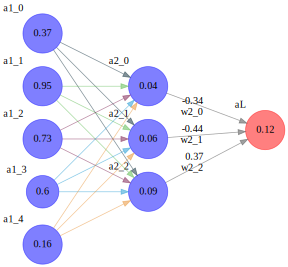

In [21]:
graph = Digraph(engine='neato')
graph.attr(size='4')

# create color gradient for weigths
color_gradient = ['#06263580', '#55b74880', '#76154880', '#1696d280', '#e88e2d80', '#0a4c6a80']

# Add output node
graph.node('output', str(output_layer[0].round(2)), xlabel='aL', color='#ff000080', style='filled', shape='circle', pos='20,-1')
# Add second layer nodes
for index, value in enumerate(second_layer):
    current_node = 'a2_' + str(index)
    current_weight = 'w2_' + str(index)
    graph.node(name=current_node, 
               label=str(value.round(2)),
               xlabel=current_node,
               color='#0000ff80', style='filled', shape='circle', pos=f'2,{-index-1}!')
    graph.edge(current_node, 'output',
               label=str(weights[index].round(2)),
               xlabel=current_weight,
               color='#42424280',)
    
# Add node for each input and it respective weight
for index_i, value in enumerate(input_layer):
    current_node = 'a1_' + str(index_i)
    current_weight = 'w1_' + str(index_i)
    graph.node(name=current_node, 
               label=str(value.round(2)),
               xlabel=current_node,
               color='#0000ff80', style='filled', shape='circle', pos=f'0,{-index_i}!')
    for index_j, value in enumerate(second_layer):
        child_node = 'a2_' + str(index_j)
        graph.edge(current_node, child_node,
                   #label=str(weights[index].round(2)),
                   #xlabel=current_weight,
                   color=color_gradient[index_i],)

print('Neural network representation with multiple neuron')
print('Neurons from input layer: ', input_layer)
print('Weights from input layer: ', input_layer_weights)
print('Neurons from second layer: ', second_layer)
print('Weights from second layer: ', second_layer_weights)
print('Neurons from output layer: ', output_layer)
graph

## Network Functions

###  Activation Functions

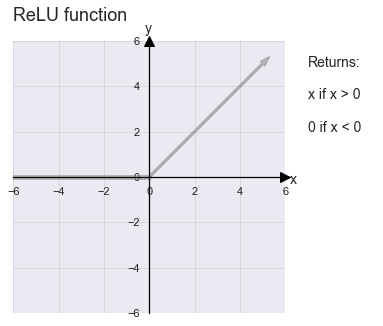

In [22]:
def ReLU(x:np.ndarray) -> np.ndarray:
    '''
    Linear function for ReLU(x)  
    Compute element-wise maximum of array elements.  
    '''
    return np.maximum(x, 0)

def ReLU_derivative(x:np.ndarray) -> np.ndarray:
    ''' Return True if x > 0, False if x < 0 '''
    return x > 0

plot_ReLU_function()

Softmax function:  
  
<p style='font-size:1.75em'>$\frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$</p>  
  
Output layer → Softmax activation function → Probabilities vector

In [23]:
def softmax(x):
    exp = expit(x - np.max(x))
    return exp / exp.sum(axis=0)

### Cost Functions

<font size=6>$MSE = \frac{\sum_{n}^{i=0}(y - y')^2} {n}$</font>

In [24]:
def mean_squared_error(y_pred, y_true):
    return 1 / len(y_pred) * np.sum((y_pred - y_true)**2)

### Init Weights/Biases

In [25]:
def init_grid(grid_size:list, unbiased=True):
    '''
    layer_size: each element of the list corresponds to the number of neurons in that layer,
    index 0 = input layer; index -1 = output layer.
    '''
    if len(grid_size) < 3:
        raise 'Grid must have at least one hidden layer.'
    
    weights_list, biases_list = [], []
    for index, layer_size in enumerate(grid_size[:-1]):
        # Random values between -0.5 and 0.5
        weights_list.append(np.random.uniform(-0.5, 0.5, size=[grid_size[index+1], layer_size]) )
        if unbiased:
            # Start with unbiased network
            biases_list.append(np.zeros([grid_size[index+1], 1]) )
        else:
            # Start with random bias
            #biases_list.append(np.random.randint(1, 5, size=grid_size[index+1]).reshape(-1,1) )
            biases_list.append(np.random.rand(grid_size[index+1], 1))
    
    return weights_list, biases_list

### One Hot Encoding

In [26]:
def one_hot_encoding(y:np.ndarray) -> np.ndarray:
    n_labels = len(np.unique(y))           # Get number of labels
    encode = np.zeros((y.size, n_labels))  # Create matrix with zeros, arrays of n_labels size
    encode[np.arange(y.size), y] = 1       # Apply one hot encoding. [i,j]; i: n observations range; j: label value corresponds to onehot index
    return encode

def single_one_hot_enc(y:int):
    encode = np.zeros((1, 10))
    encode[np.arange(1), y] = 1
    return encode.T

### Foward Propagation

In [27]:
def foward_propagation(X:np.ndarray, y_true:np.ndarray, weights:list, biases:list, 
                       act_func:any, loss:any, acc=0, verbose=False) -> np.ndarray:
    '''
    X : Features to be trained  
    weights: list of weights, shape[i,j], where i = number of nodes, j = number of connections  
    biases: list of biases, shape[i], where i = number of nodes  
    act_func: activation function used in hidden layers  
    loss: function used to calculate the ouput cost/error  
    '''
    n_layers = len(weights)
    layer_grid = {}
    layer_grid['L0'] = X
    # Iterate over input and hidden layers
    for layer_index in range(n_layers):
        previous_index = 'L' + str(layer_index)
        current_index = 'L' + str(layer_index+1)
        if verbose:
            print(f'Creating {f"Hidden layer L{layer_index+1}" if layer_index !=n_layers-1 else f"Output layer L{n_layers}"}',
                  f'size = {weights[layer_index].shape[0]}',
                  f'L{layer_index} shape: {layer_grid[previous_index].shape}',
                  f'L{layer_index+1} Weights shape: {weights[layer_index].shape}', 
                  f'L{layer_index+1} Bias shape: {biases[layer_index].shape}',
                  '='*50,sep='\n')
        # Compute the actiation function for each neuron in the next layer
        layer_grid[current_index] = act_func(weights[layer_index].dot(layer_grid[previous_index]) + biases[layer_index])
    output_layer = layer_grid[current_index]
    
    # Calculate the Cost
    error = loss(output_layer, y_true)
    # Make prediction
    acc += int(np.argmax(output_layer) == np.argmax(y_true))
    if verbose:
        print(f'Predicted label = {np.argmax(output_layer)}, True label = {np.argmax(y_true)}')
    return acc, layer_grid

In [28]:
# Build sample NN and test Foward Propagation
sample = np.random.randint(0,1000)                     # Select a random index
X_ = np.array(train_df.iloc[sample,1:]).reshape(-1,1)  # Select sample features (pixels)
y_ = single_one_hot_enc(train_df.iloc[sample,0])       # Select sample labels processed with onehot encoding
layer_shape = [X_.shape[0], 3, 2, y_.shape[0]]         # Define layers shape
weights, biases = init_grid(layer_shape, False)        # Init random weights and biases based on grid values
_, layer_grid = foward_propagation(                    # Apply one step of foward_propagation
    X_, y_, weights, biases, sigmoid, mean_squared_error, verbose=True)

Creating Hidden layer L1
size = 3
L0 shape: (784, 1)
L1 Weights shape: (3, 784)
L1 Bias shape: (3, 1)
Creating Hidden layer L2
size = 2
L1 shape: (3, 1)
L2 Weights shape: (2, 3)
L2 Bias shape: (2, 1)
Creating Output layer L3
size = 10
L2 shape: (2, 1)
L3 Weights shape: (10, 2)
L3 Bias shape: (10, 1)
Predicted label = 9, True label = 9


/var/folders/_m/3m0bcc4n6h73gny0bt6_g4x80000gn/T/ipykernel_19034/1062660224.py:1: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: 1 / (1 + np.exp(-x))


### Back Propagation

Sigmoid derivative  
$\sigma(x) (1 - \sigma(x))$


In [29]:
sigmoid_derivative = lambda x : x * (1 - x)

In [30]:
def back_propagation(layer_grid, weights, biases, y_true, lr=0.01):
    layer_size = len(weights)
    # Output Layer to Hidden Layer
    current_layer = 'L' + str(layer_size)    # Ln = Output layer
    next_layer = 'L' + str(layer_size-1)     # Ln-1 = Last hidden layer
    delta_prev = layer_grid[current_layer] - y_true
    # Update weights/biases with learning rate
    weights[-1] += -lr * delta_prev @ layer_grid[next_layer].T 
    biases[-1] = biases[-1] + (-lr * delta_prev)
    # Addition Hidden Layers to Input Layer
    for i in range(len(weights)-1, 0, -1):
        current_layer = 'L' + str(i)
        next_layer = 'L' + str(i-1)
        delta_i = weights[i].T @ delta_prev * sigmoid_derivative(layer_grid[current_layer])
        weights[i-1] = weights[i-1] + (-lr * delta_i @ layer_grid[next_layer].T)
        biases[i-1] = biases[i-1] + (-lr * delta_i)
        delta_prev = delta_i
    
    return weights, biases
    

In [31]:
# Test Back propagation
X_ = np.array(train_df.iloc[0,1:]).reshape(-1,1)              
y_ = single_one_hot_enc(train_df.iloc[0,0])
layer_size = [X_.shape[0], 16,8,  y_.shape[0]]
weights, biases = init_grid(layer_size, unbiased=False)
_, layer_grid = foward_propagation(X_, y_, weights, biases, sigmoid, mean_squared_error, verbose=True)
weights, biases = back_propagation(layer_grid, weights, biases, y_, lr=0.01)

Creating Hidden layer L1
size = 16
L0 shape: (784, 1)
L1 Weights shape: (16, 784)
L1 Bias shape: (16, 1)
Creating Hidden layer L2
size = 8
L1 shape: (16, 1)
L2 Weights shape: (8, 16)
L2 Bias shape: (8, 1)
Creating Output layer L3
size = 10
L2 shape: (8, 1)
L3 Weights shape: (10, 8)
L3 Bias shape: (10, 1)
Predicted label = 2, True label = 1


/var/folders/_m/3m0bcc4n6h73gny0bt6_g4x80000gn/T/ipykernel_19034/1062660224.py:1: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: 1 / (1 + np.exp(-x))


### Epoch example

In [40]:
def train_nn(X, y, hidden_layers:list, epochs=3, lr=0.01):
    
    n_samples = X.shape[0]
    # Define network structure
    layer_size = [X.shape[1]]
    layer_size.extend(hidden_layers)
    layer_size.extend([y.shape[1]])
    # Init ranom weights/biases
    weights, biases = init_grid(layer_size, unbiased=True)
    # Train neural network
    for epoch in range(epochs):
        acc = 0
        pbar = tqdm(range(n_samples), desc=f'Epoch {epoch+1} Acc=0 ')
        for index in pbar:
            _X = X[index].reshape(-1,1)
            _y = y[index].reshape(-1,1)
            # Foward Propagation
            acc, layer_grid = foward_propagation(_X, _y, weights, biases, sigmoid, mean_squared_error, acc, verbose=False)
            # Back Propagation
            weights, biases = back_propagation(layer_grid, weights, biases, _y, lr)
            pbar.set_description(f'Epoch {epoch+1} Acc={acc/n_samples*100:.2f} ')
        pbar.close()

    print(f'Accuracy = {acc/n_samples*100:.2f}%')
    
    return weights, biases

In [33]:
# Load images/labels
images = np.array(train_df.iloc[:,1:]) / 255
labels = one_hot_encoding(train_df.iloc[:,0])
# Run one epoch
w, b = train_nn(images, labels, [16, 16], epochs=1)

Epoch 1 Acc=0 :   0%|          | 0/42000 [00:00<?, ?it/s]

Accuracy = 70.76%


## Make Predictions

In [34]:
def nn_predict(X:np.ndarray, y:np.ndarray, weights:list, biases:list, act_func=None) -> np.ndarray:
    n_samples = X.shape[0]
    n_layers = len(weights)
    y_pred = []
    acc = 0
    if not act_func:
        act_func = sigmoid
    
    # Iterate over samples
    pbar = tqdm(range(n_samples), desc='Making predictions')
    for index in pbar:
        _X = X[index].reshape(-1,1)
        _y = y[index].reshape(-1,1)
        
        previous_layer = _X
        for layer_index in range(n_layers):
            output_layer = act_func(weights[layer_index].dot(previous_layer) + biases[layer_index])
            previous_layer = output_layer
        # Make prediction
        y_pred.append(output_layer)
        acc += int(np.argmax(output_layer) == np.argmax(_y))
    pbar.close()
    score = acc/n_samples*100
    print(f'Accuracy = {score:.2f}%')
    return y_pred, score

In [35]:
y_pred, acc_score = nn_predict(images, labels, w, b)

Making predictions:   0%|          | 0/42000 [00:00<?, ?it/s]

Accuracy = 88.86%


## Testing with train/test data

In [36]:
# Convert from pd.DataFrame to numpy.ndarray
data = np.array(train_df)
# 42000 obervations, 1 class + 784 features
data.shape

(42000, 785)

In [41]:
# Shuffle the data
np.random.seed(42)
np.random.shuffle(data)
# Define train size of 80%
train_size = int(42000 * 0.8)
# Train data split, 0 : train_ize
X_train , y_train = data[:train_size,1:], data[:train_size,0]
# Test data split, train_size : -1
X_test, y_test = data[train_size:,1:], data[train_size:,0]
# Scale values to range (0,1)
X_train = X_train / 255.
X_test = X_test / 255.
# Apply one hot encoding on labels
y_train, y_test = one_hot_encoding(y_train), one_hot_encoding(y_test)

X_train image n=0 shape:  (33600,)
y_train image n=0 label:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


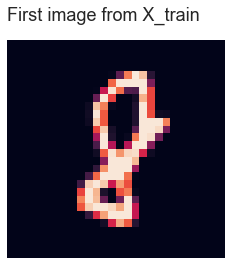

In [38]:
# Data example
print('X_train image n=0 shape: ', X_train[:, 0].shape)
print('y_train image n=0 label: ', y_train[0])
# Show image
plt.title('First image from X_train', size=18, pad=20, loc='left')
plt.imshow(X_train[0].reshape(28,28))
plt.grid(False); plt.axis(False);

In [42]:
w, b = train_nn(X_train, y_train, hidden_layers=[16, 16], epochs=8)

Epoch 1 Acc=0 :   0%|          | 0/33600 [00:00<?, ?it/s]

Epoch 2 Acc=0 :   0%|          | 0/33600 [00:00<?, ?it/s]

Epoch 3 Acc=0 :   0%|          | 0/33600 [00:00<?, ?it/s]

Epoch 4 Acc=0 :   0%|          | 0/33600 [00:00<?, ?it/s]

Epoch 5 Acc=0 :   0%|          | 0/33600 [00:00<?, ?it/s]

Epoch 6 Acc=0 :   0%|          | 0/33600 [00:00<?, ?it/s]

Epoch 7 Acc=0 :   0%|          | 0/33600 [00:00<?, ?it/s]

Epoch 8 Acc=0 :   0%|          | 0/33600 [00:00<?, ?it/s]

Accuracy = 94.99%


In [43]:
# Make predictions
y_pred_train, acc_score = nn_predict(X_train, y_train, w, b)

Making predictions:   0%|          | 0/33600 [00:00<?, ?it/s]

Accuracy = 95.52%


In [44]:
y_pred_train = np.array(y_pred_train).reshape(33600, 10)

In [45]:
np.sum(np.argmax(y_pred_train, axis=1) == np.argmax(y_train, axis=1)) / y_train.shape[0]

0.9552083333333333

In [46]:
pred = np.argmax(y_pred_train, axis=1)

unique, counts = np.unique(pred, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 3394],
       [   1, 3741],
       [   2, 3369],
       [   3, 3369],
       [   4, 3358],
       [   5, 3055],
       [   6, 3348],
       [   7, 3553],
       [   8, 3250],
       [   9, 3163]])

In [47]:
# Make predictions
sample_test = np.random.randint(0,1000)
_X = X_test[sample_test].reshape(-1,1)
acc, _ = foward_propagation(_X, y_test[sample_test], 
            weights, biases, sigmoid, mean_squared_error, verbose=True)

Creating Hidden layer L1
size = 16
L0 shape: (784, 1)
L1 Weights shape: (16, 784)
L1 Bias shape: (16, 1)
Creating Hidden layer L2
size = 8
L1 shape: (16, 1)
L2 Weights shape: (8, 16)
L2 Bias shape: (8, 1)
Creating Output layer L3
size = 10
L2 shape: (8, 1)
L3 Weights shape: (10, 8)
L3 Bias shape: (10, 1)
Predicted label = 2, True label = 4


In [48]:
acc

0

# Mini NN

In [49]:
# def get_mnist():
#     with np.load(f"mnist.npz") as f:
#         images, labels = f["x_train"], f["y_train"]
#     images = images.astype("float32") / 255
#     images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
#     labels = np.eye(10)[labels]
#     return images, labels

In [50]:
# images, labels = get_mnist()
# w_i_h = np.random.uniform(-0.5, 0.5, (20, 784))
# w_h_o = np.random.uniform(-0.5, 0.5, (10, 20))
# b_i_h = np.zeros((20, 1))
# b_h_o = np.zeros((10, 1))

In [51]:
# learn_rate = 0.01
# nr_correct = 0
# epochs = 3

# for epoch in range(epochs):
#     pbar = tqdm(zip(images, labels), total=images.shape[0])
#     for img, l in pbar:
#         img.shape += (1,)
#         l.shape += (1,)
#         # Forward propagation input -> hidden
#         h_pre = b_i_h + w_i_h @ img
#         h = 1 / (1 + np.exp(-h_pre))
#         # Forward propagation hidden -> output
#         o_pre = b_h_o + w_h_o @ h
#         o = 1 / (1 + np.exp(-o_pre))

#         # Cost / Error calculation
#         e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
#         nr_correct += int(np.argmax(o) == np.argmax(l))

#         # Backpropagation output -> hidden (cost function derivative)
#         delta_o = o - l
#         w_h_o += -learn_rate * delta_o @ np.transpose(h)
#         b_h_o += -learn_rate * delta_o
#         # Backpropagation hidden -> input (activation function derivative)
#         delta_h = np.transpose(w_h_o) @ delta_o * (h * (1 - h))
#         w_i_h += -learn_rate * delta_h @ np.transpose(img)
#         b_i_h += -learn_rate * delta_h
        
#         pbar.set_description(f'Acc: {nr_correct / images.shape[0] * 100:.2f}')
        
#     pbar.close()
#     # Show accuracy for this epoch
#     print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
#     nr_correct = 0

# NN CLass

In [54]:
ReLU(-2)

0

In [56]:

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, act_func):
        self.weights = np.random.uniform(-0.5, 0.5, (n_inputs, n_neurons))
        self.bias = np.zeros((1, n_neurons))
        self.act_func = act_func
    def foward_prop(self, inputs):
        self.output = self.act_func(self.weights @ inputs + self.bias)



In [ ]:
class Layer:
    def __init__(self, n_input:np.ndarray, n_output:np.ndarray, 
                 act_func:str, cost_func:str, random_state=None) -> None:
        np.random.seed(random_state)
        self.weights = np.random.uniform(-0.5, 0.5, size=[n_output, n_input])
        self.bias = np.zeros([n_output, 1])
        self.act_func = select_act_func(act_func)
        self.cost_func = select_cost_func(cost_func)
        
    def select_act_func(self, act_func):
        if act_func == 'sigmoid':
            self.act_func = sigmoid
            self.act_func_d = sigmoid_d
        elif act_func == 'relu':
            self.act_func = relu
            self.act_func_d = relu_d
        elif act_func == 'softmax':
            self.act_func = softmax
            self.act_func_d = softmax_d
        else:
            raise f'Unknow function: {act_func}\nChooe between "sigmoid","relu","softmax"'
            
    def select_cost_func(self, cost_func):
        if cost_func == 'mse':
            self.cost_func = mse
            self.cost_func_d = mse_d
        elif cost_func == 'cross-entropy':
            self.cost_func = cross_ent
            self.cost_func_d = cross_ent_d
        else:
            raise f'Unknow function: {cost_func}\nChooe between "mse","cross-entropy"'
            
    def foward_propagation(self, inputs, weights, bias):
        z1 = weights @ inputs + bias
        a2_layer = sigmoid(z1)

In [ ]:
class NeuralNetwork:
    
    def __init__(self, random_state=None)-> None:
        self.random_state = random_state
        pass
    
    def add_layer(self, size, ):
        pass
    
    def fit(self, X, y) -> None:  
        # Input layer neurons
        self.ainput_size = X.shape[1] 
        # Output layer neurons
        self.output_labels = np.unique(np.argmax(y, axis=1)).size
        pass
    
              
    
    def init_wb():
        # Set random seed, if any
        np.random.seed(self.random_state)
        # Random weights for L1, L2
        self.a1_weights = np.random.uniform(-0.5, 0.5, size=[a2_size, a1_size])
        self.a2_weights = np.random.uniform(-0.5, 0.5, size=[a3_size, a2_size])
        # Set bias for L1, L2 with 0 values (unbiased)
        self.a1_bias = np.zeros([a2_size, 1])         
        self.a2_bias = np.zeros([a3_size, 1])
    
    def predict(self) -> None:
        pass

In [52]:
import session_info

session_info.show()